# Barbara Gaspar Chan Tong          RA: 11201721332

In [14]:
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt

from scipy import ndimage
from skimage.color import rgb2gray

In [15]:
imgBrain = imageio.imread('./Head.jpeg')

print('maximum grayscale value',np.max(imgBrain))
print('minimum grayscale value', np.min(imgBrain))

imgBrain = rgb2gray(imgBrain)

maximum grayscale value 255
minimum grayscale value 0


In [16]:
imgBrainFreq = np.fft.fft2(imgBrain)

imgBrainFshift = np.fft.fftshift(imgBrainFreq)

# Filtro sobel

In [46]:
def sobelFilter(img):
    horizOperator = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    vertOperator = np.transpose(horizOperator)

    horizBorder = ndimage.convolve(img, horizOperator)
    vertBorder = ndimage.convolve(img, vertOperator)

    return horizBorder, vertBorder

In [47]:
horizBorder, vertBorder = sobelFilter(imgBrain)

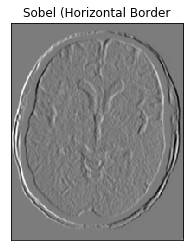

In [49]:
plt.imshow(horizBorder, cmap = 'gray')
plt.title('Sobel (Horizontal Border'), plt.xticks([]), plt.yticks([])
plt.show()

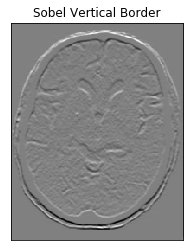

In [48]:
plt.imshow(vertBorder, cmap = 'gray')
plt.title('Sobel Vertical Border'), plt.xticks([]), plt.yticks([])
plt.show()

# filtro passa baixa

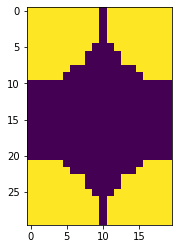

In [58]:
def create_uv2(MN):
    lower = np.arange(np.int(np.floor(-MN/2))+1, 0)
    upper = np.arange(0,np.int(np.floor(MN/2))+1)
    return( np.concatenate((upper,lower) ))

for M in range(4,9):
    u = create_uv2(M)
    # print(f"M={M}, u = {u}")

M = 20
N = 30

u = create_uv2(M)
v = create_uv2(N)

U, V  = np.meshgrid ( u, v )

xcentre = 0
ycentre = 0
mask = (U - xcentre )**2 + (V - ycentre )**2 < 100;

plt.imshow(mask)
plt.show()

In [69]:
M,N=np.shape(imgBrainFreq)

u = create_uv2(N)
v = create_uv2(M)

U, V  = np.meshgrid ( u, v)

In [79]:
def fftFilt ( centre ,U ,V , It , radius):
    # Ideal low pass filter in frequency domain
    # centre = centre of LPF
    # radius = radius of LPF
    # U,V = coord system (meshgrid)
    
    mask = (U - centre [0] )**2 + (V - centre [1] )**2 < radius**2

   
    J = It * mask ;
    
    #take real part, since the array can contain small imaginary values due to numerical precision
    j = np.real( np.fft.ifft2( J ) ) 
    
    plt.figure(figsize=(8,4))
    
    plt.subplot(121),plt.imshow(mask,cmap='gray')
    plt.title(f'Mask (Ideal Low Pass Filter) radius={radius} position ({centre[0]}, {centre[1]})'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(j, cmap = 'gray')
    plt.title(f"Filtered Image"), plt.xticks([]), plt.yticks([])
    plt.show()
    return j

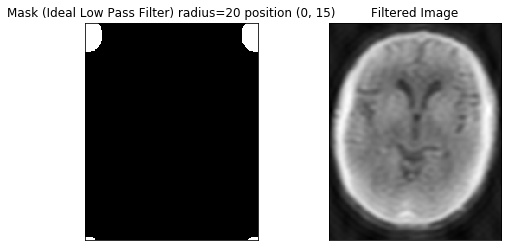

In [80]:
fftFiltredBrain = fftFilt([0, 15], U, V, imgBrainFreq,  20)

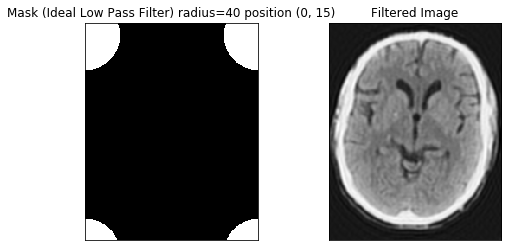

In [81]:
fftFiltredBrain = fftFilt([0, 15], U, V, imgBrainFreq,  40)

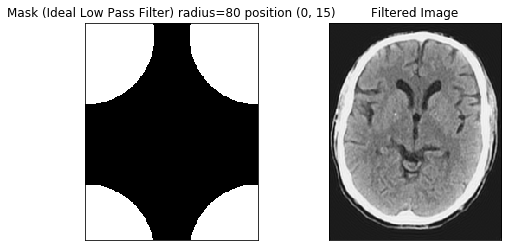

In [82]:
fftFiltredBrain = fftFilt([0, 15], U, V, imgBrainFreq,  80)

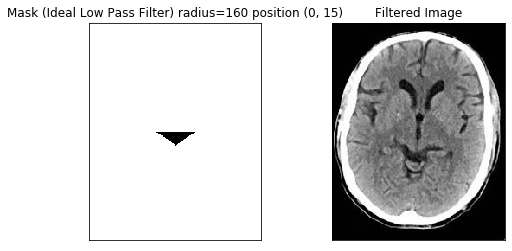

In [84]:
fftFiltredBrain = fftFilt([0, 15], U, V, imgBrainFreq, 160)

<function matplotlib.pyplot.show(*args, **kw)>

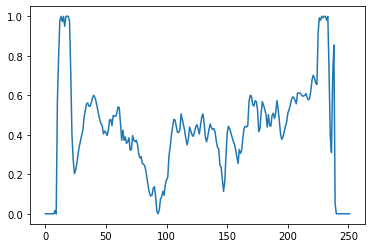

In [91]:
yAxis = fftFiltredBrain[:, 110]
#print(np.shape(xAxis))

plt.plot(yAxis)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

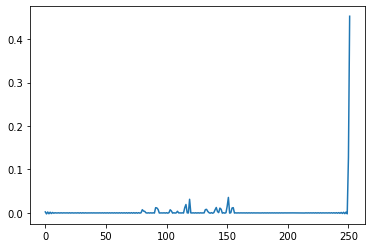

In [93]:
yAxis = fftFiltredBrain[:, 199]
#print(np.shape(xAxis))

plt.plot(yAxis)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

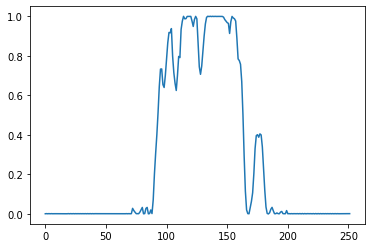

In [94]:
yAxis = fftFiltredBrain[:, 10]
#print(np.shape(xAxis))

plt.plot(yAxis)
plt.show

# Exercício sobre bordas agudas

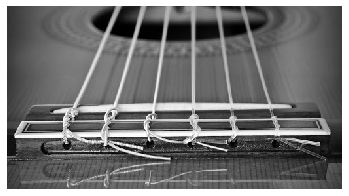

In [11]:
guitar = cv2.imread('./guitar.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(guitar, cmap='gray')
plt.axis('off')
plt.show()

fftGuitar = np.fft.fft2(guitar)

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


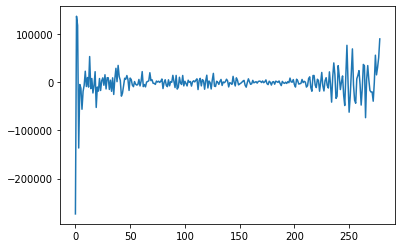

In [12]:
yAxis = fftGuitar[:, 10]
#print(np.shape(xAxis))

plt.plot(yAxis)
plt.show()

In [3]:
lowPassFilter = ndimage.fourier_gaussian(fftGuitar, sigma=4)

(-0.5, 511.5, 278.5, -0.5)

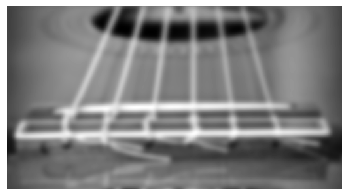

In [7]:
plt.imshow(imgInvFFT, cmap='gray')
plt.axis('off')
plt.show()

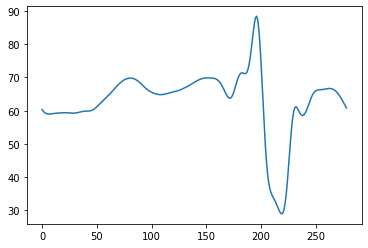

In [10]:
imgInvFFT = np.real(np.fft.ifft2(lowPassFilter))

yAxis = imgInvFFT[:, 10]
#print(np.shape(xAxis))

plt.plot(yAxis)
plt.show()